## Imports

In [4]:
import numpy as np
import time
import os
import gym
import sys
from gym import error, spaces
from gym import utils
from gym.utils import seeding
try:
    import atari_py
except ImportError as e:
    raise error.DependencyNotInstalled(
            "{}. (HINT: you can install Atari dependencies by running "
            "'pip install gym[atari]'.)".format(e))

## Get RAM

In [3]:
def to_ram(ale):
    ram_size = ale.getRAMSize()
    ram = np.zeros((ram_size), dtype=np.uint8)
    ale.getRAM(ram)
    return ram

 ### Fragmented game vizualization

Agent has 5 lives


In [6]:
env = gym.make('Breakout-v0')
env.reset()
for i in range(200):
    if i % 100 == 0:
        print(i)
    env.render()
    env.step(env.action_space.sample()) # take a random action
    time.sleep(0.1)
print("Finished")
env.close()

0
100
Finished


### Game info vizualization

* info has remaining lives of agent
* reward seems to be 0
* observation seems to be matrix of 0 or 142


In [6]:
env = gym.make('Breakout-v0')
print_observation = False
for i_episode in range(3):
    observation = env.reset()
    for t in range(1000):
        env.render()
        if (t + 1) % 100 == 0:
            print(f"info: {info}")
        action = env.action_space.sample()
        observation, reward, done, info = env.step(action)
        if reward > 0:
            print(reward, info)
        time.sleep(0.001)
        if done:
            print(f"observations shape: {observation.shape}")
            print(f"reward: {reward}")
            print(f"info: {info}")
            print("Episode finished after {} timesteps".format(t+1))
            if print_observation:
                for x in observation:
                    if np.amax(x) > 0:
                        print(x)
                        break
            break
env.close()

info: {'ale.lives': 3}
observations shape: (210, 160, 3)
reward: 0.0
info: {'ale.lives': 0}
Episode finished after 168 timesteps
info: {'ale.lives': 3}
1.0 {'ale.lives': 3}
info: {'ale.lives': 2}
1.0 {'ale.lives': 2}
info: {'ale.lives': 1}
observations shape: (210, 160, 3)
reward: 0.0
info: {'ale.lives': 0}
Episode finished after 309 timesteps
info: {'ale.lives': 3}
observations shape: (210, 160, 3)
reward: 0.0
info: {'ale.lives': 0}
Episode finished after 169 timesteps


### Env data

In [7]:
print(env.action_space)
print(env.observation_space)
print(env.observation_space.shape)
# print(env.observation_space.high)
# print(env.observation_space.low)

Discrete(4)
Box(0, 255, (210, 160, 3), uint8)
(210, 160, 3)


### Printing the entire np array

In [8]:
from gym import envs
# print(envs.registry.all())

In [7]:
np.set_printoptions(threshold=sys.maxsize) 
observation = env.reset()
for t in range(1):
    action = env.action_space.sample()
    observation, reward, done, info = env.step(action)
observation.shape

(210, 160, 3)

In [8]:
def rgb_to_greyscale(observation):
    observation = observation[:,:,0] + observation[:,:,1] + observation[:,:,2]
    return np.where(observation > 0, 255, 0)[::2, ::2]

In [9]:
test_3 = rgb_to_greyscale(observation)

In [10]:
test_3.shape


(105, 80)

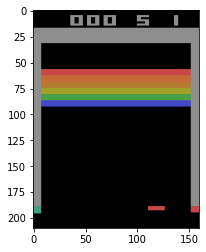

In [12]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
imgplot = plt.imshow(observation)

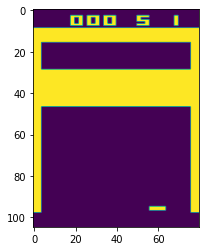

In [13]:
imgplot = plt.imshow(test_3)

In [35]:
def rgb_to_greyscale(observation):
    observation = observation[:,:,0] + observation[:,:,1] + observation[:,:,2]
    return np.where(observation > 0, 255, 0)[::2, ::2]

### Playing more with gym env

In [19]:
env = gym.make("Breakout-v4").env
env.render()
print(f"Action Space {env.action_space}")
print(f"State Space {env.observation_space}")
time.sleep(2)
env.close()

Action Space Discrete(4)
State Space Box(0, 255, (210, 160, 3), uint8)


In [16]:
env = gym.make("Breakout-v0")
print("env:", env)
print("env.env:", env.env)
predicted_action = 2
previous_lives = 5

observation = env.reset()
env.step(1)
for t in range(200):
    env.render()
    action = env.action_space.sample()
    action =  2 if np.random.random(1)[0] > 0.5 else 3
    observation, reward, done, info = env.step(action)
    if done:
        break
    if info["ale.lives"] != previous_lives:
        env.step(1)
        previous_lives = info["ale.lives"]
    if reward > 0:
        print("Not negative reward", reward, info)
    time.sleep(0.1)
    if done:
        break


time.sleep(2)
env.close()
# print("help:", help(env.env))

env: <TimeLimit<AtariEnv<Breakout-v0>>>
env.env: <AtariEnv<Breakout-v0>>
Not negative reward 1.0 {'ale.lives': 2}
